<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [2]:
"""!pip install pandas
!pip install matplotlib"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Load the dataset


In [5]:
#file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
file_path='survey-data.csv'
df = pd.read_csv(file_path)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




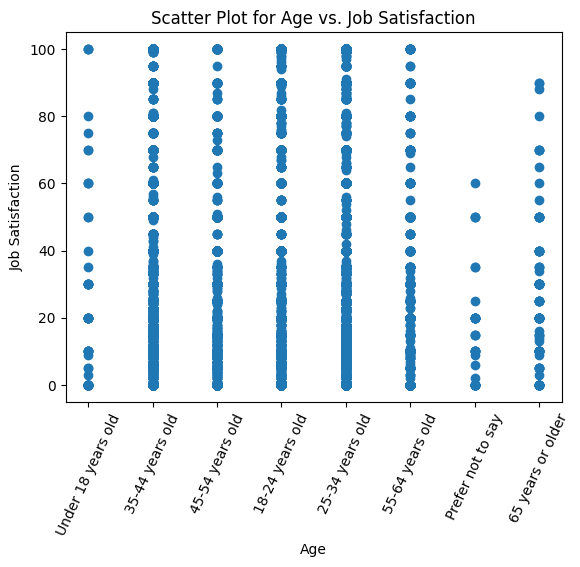

In [34]:
## Write your code here
plt.Figure(figsize=(10, 6))
plt.scatter(data=df, x='Age', y='JobSatPoints_6', marker='o')
plt.title('Scatter Plot for Age vs. Job Satisfaction')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation = 65)
plt.xlabel('Age')
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


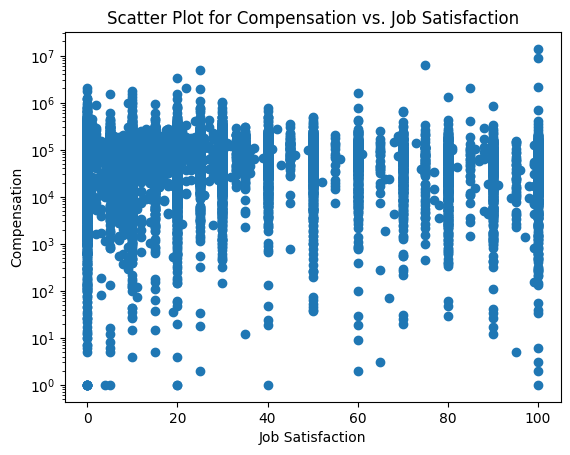

In [8]:
## Write your code here
plt.Figure(figsize=(10, 6))
plt.scatter(data=df, y='ConvertedCompYearly', x='JobSatPoints_6', marker='o')
plt.title('Scatter Plot for Compensation vs. Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Compensation')

plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


In [36]:
## Write your code here
df_age = df

df_age['Age']=df_age['Age'].replace({'years old':'', 'Under':'','Prefer not to say':'','years or older':''}, regex=True)

df_age['Age'] = df_age['Age'].str.strip()
def clean_age(value):
    if isinstance(value, (int, float)):
        return float(value) 
    if '-' in value:
        start, end = map(float, value.split('-'))
        return (start + end) / 2
    elif value.isdigit():
        return float(value)
    return None

df_age['Age'] = df_age['Age'].apply(clean_age)

In [19]:
df_age = df_age.dropna(subset=['Age', 'JobSatPoints_6'], axis =  0)

In [28]:
import numpy as np
slope, intercept, = np.polyfit(df_age['Age'],df_age['JobSatPoints_6'], 1)

In [29]:
slope , intercept

(np.float64(-0.14271919379986403), np.float64(29.237854568448235))

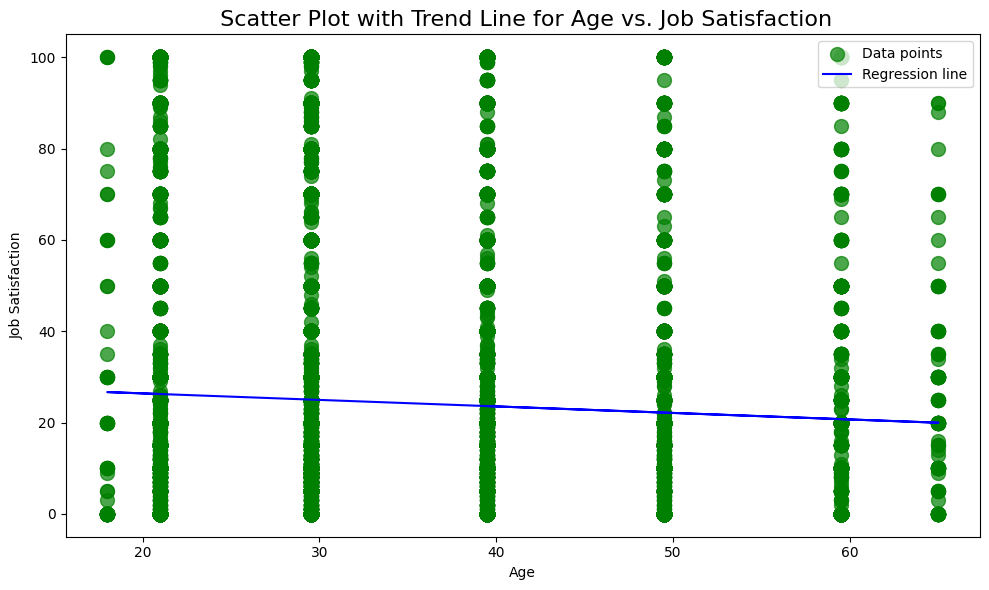

In [31]:
x=df_age['Age']
y= df_age['JobSatPoints_6']
y1 = (slope*x) + intercept
plt.figure(figsize=(10,6))
plt.scatter(x, y, marker='o', color='green',label='Data points', s=100, alpha=0.7)
plt.title(' Scatter Plot with Trend Line for Age vs. Job Satisfaction', fontsize = 16)
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')

plt.plot(x, y1, color='blue', label='Regression line')

plt.legend()
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


In [41]:
df_age= df_age.dropna(subset=['YearsCodePro'], axis=0)
df_age['YearsCodePro']=df_age['YearsCodePro'].replace({'More than 50 years': '55', 'Less than 1 year': '0.5'}, regex = True).str.strip()
df_age['YearsCodePro'] = df_age['YearsCodePro'].astype('float64')
df_age['YearsCodePro'] = df_age['YearsCodePro'].sort_values()

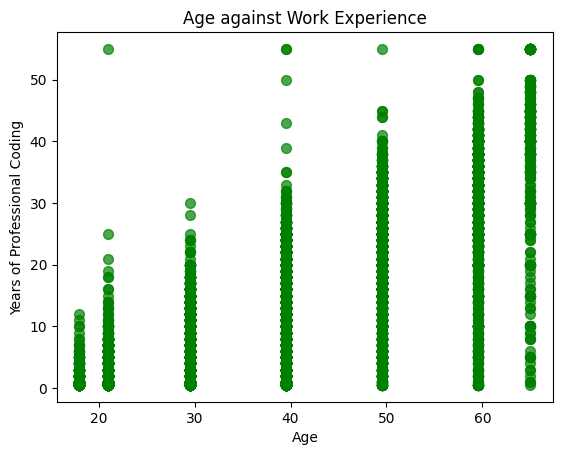

In [43]:
## Write your code here
x=df_age['Age']
y=df_age['YearsCodePro']

plt.Figure(figsize=(8,5))
plt.scatter(x, y, marker='o', color='green', s=50, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding')
plt.title('Age against Work Experience')
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


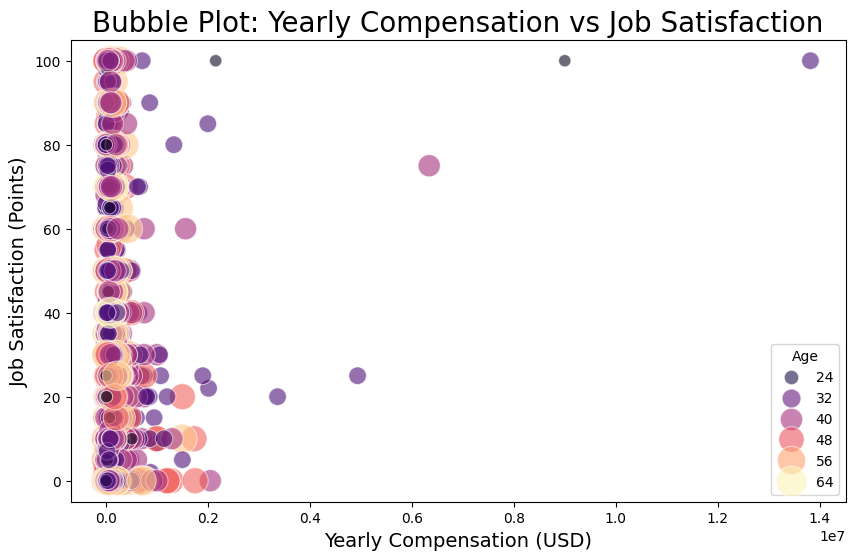

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_age, 
                x='ConvertedCompYearly', 
                y='JobSatPoints_6', 
                size='Age', 
                sizes=(50, 500),
                 hue='Age',
                palette='magma', 
                alpha=0.6)

plt.title('Bubble Plot: Yearly Compensation vs Job Satisfaction', fontsize=20)
plt.xlabel('Yearly Compensation (USD)', fontsize=14)
plt.ylabel('Job Satisfaction (Points)', fontsize=14)

plt.show()



#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [83]:
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].dropna().str.split(';')

df_exploded = df.explode('LanguageHaveWorkedWith')
df_exploded = df_exploded.dropna(subset=['LanguageHaveWorkedWith', 'JobSat'], axis=0)

In [84]:

# Group by 'LanguageHaveWorkedWith' and 'JobSat', then count occurrences
grouped_df = df_exploded.groupby(['LanguageHaveWorkedWith', 'JobSat']).size().reset_index(name='Count')
top_lang = df_exploded['LanguageHaveWorkedWith'].value_counts().nlargest(15).index

filtered_df = df_exploded[df_exploded['LanguageHaveWorkedWith'].isin(top_lang)]

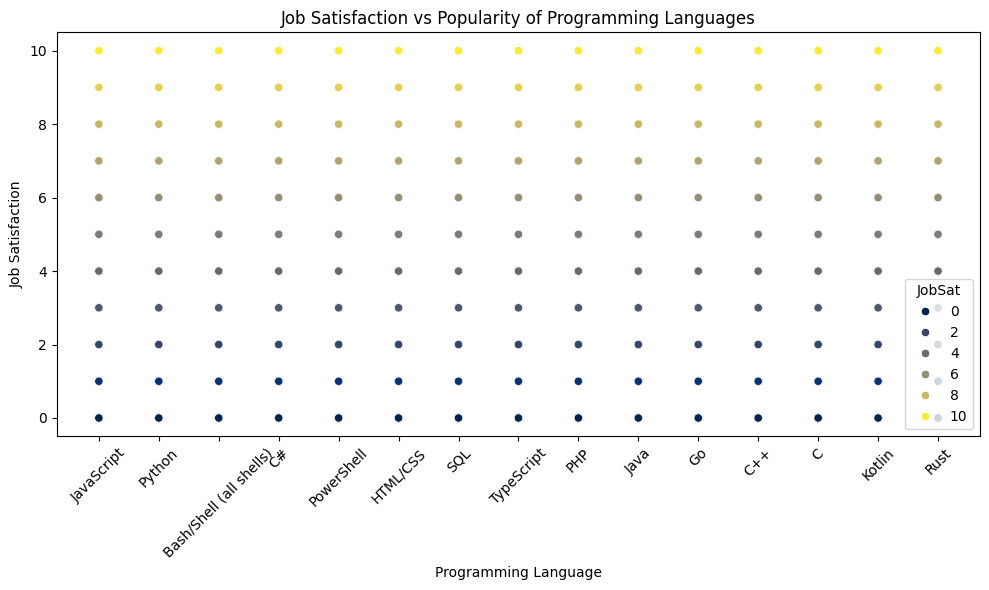

In [90]:
## Write your code here
plt.figure(figsize=(10,6))
sns.scatterplot(x='LanguageHaveWorkedWith', y='JobSat',hue='JobSat', palette='cividis', data=filtered_df)

plt.title('Job Satisfaction vs Popularity of Programming Languages')
plt.xlabel('Programming Language')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


In [6]:
mode = df['Employment'].mode()[0]
df['Employment'] = df['Employment'].fillna(mode).str.split(',')
df_exploded1 = df.explode('Employment')

In [7]:
df_exploded1['Employment']=df_exploded1['Employment'].replace({' and not ':'',' or ':'',' but ':'',}, regex = True)
df_exploded1['Employment']=df_exploded1['Employment'].str.strip()
df_exploded1=df_exploded1.drop_duplicates().reset_index()

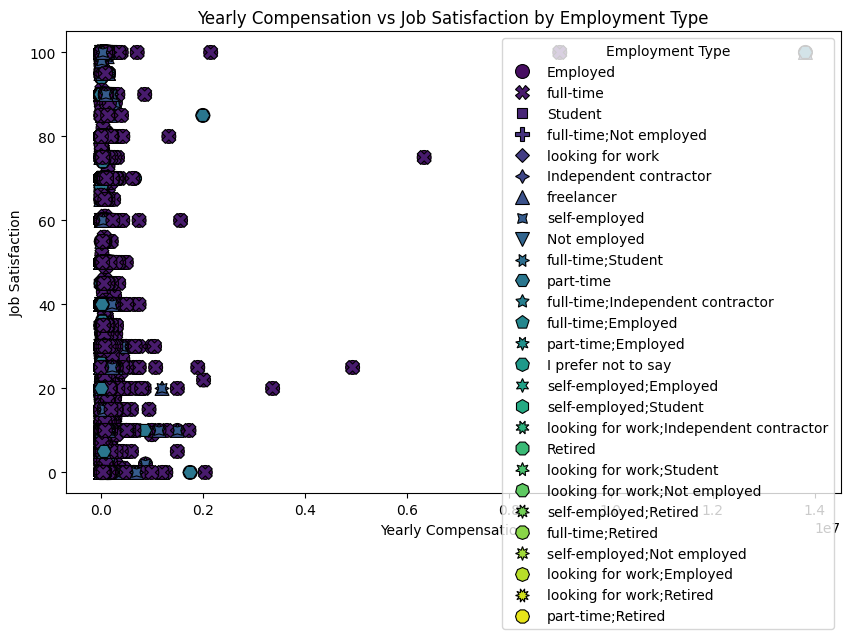

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_exploded1, 
    x='ConvertedCompYearly', 
    y='JobSatPoints_6', 
    hue='Employment', 
    style='Employment', 
    palette='viridis', 
    s=100, 
    edgecolor='black'
)

# Labels and title
plt.xlabel("Yearly Compensation")
plt.ylabel("Job Satisfaction")
plt.title("Yearly Compensation vs Job Satisfaction by Employment Type")
plt.legend(loc = 'upper right',title="Employment Type")

# Show plot
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


C:\Users\choph\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


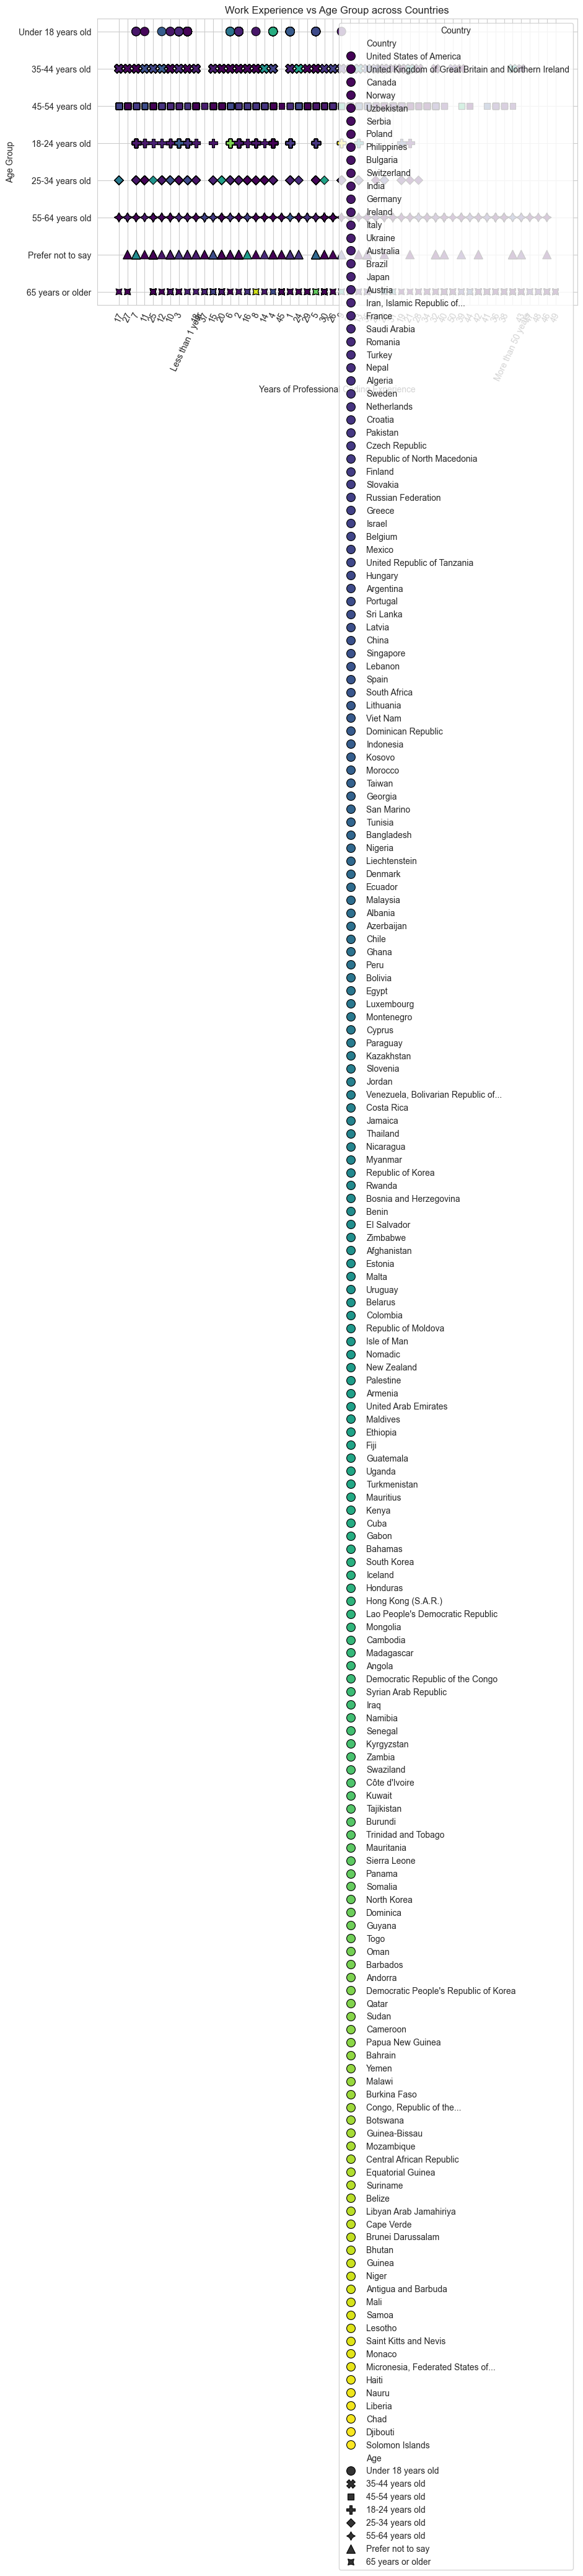

In [138]:
## Write your code here
unique_age_groups = df['Age'].unique()
unique_countries = df['Country'].unique()

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Scatter plot comparing work experience across age groups and countries
sns.scatterplot(
    data=df, 
    x='YearsCodePro', 
    y='Age', 
    hue='Country', 
    style='Age', 
    palette='viridis', 
    s=100, 
    edgecolor='black'
)

# Labels and title
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Age Group")
plt.xticks(rotation = 65)
plt.title("Work Experience vs Age Group across Countries")
plt.legend(title="Country")

# Show plot
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
